# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import nltk
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go

# Reading the Training Data provided.

In [0]:
data_train = pd.read_csv('train.csv')

In [0]:
data_copy = data_train.copy()

# Trying to draw some insights from data

In [147]:
data_copy.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [148]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB
None


In [149]:
data_copy.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [150]:
data_copy.shape

(82657, 12)

In [151]:
data_copy['variety'].nunique()

28

In [152]:
print(np.max(data_copy['points']),np.min(data_copy['points']))

100 80


In [153]:
data_copy.isnull().sum()


user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

# Fixing the Nan values 

In [0]:
data_copy['price'].fillna(data_copy['price'].mean(),inplace=True)
data_copy['country'].fillna('Unknown',inplace=True)
data_copy.drop(['user_name'],axis=1,inplace=True)
data_copy['designation'].fillna('Unknown',inplace=True)
data_copy['province'].fillna('Unknown',inplace=True)
data_copy['region_1'].fillna('Unknown',inplace=True)
data_copy['region_2'].fillna('Unknown',inplace=True)

In [155]:
data_copy.isnull().sum()


country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

# Visualizing the data

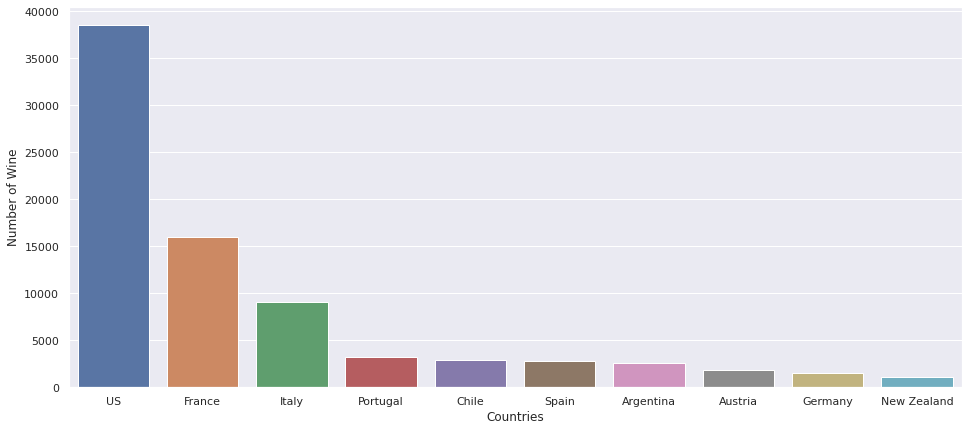

In [156]:
plt.figure(figsize=(16,7))
sns.set(style="darkgrid")
sns.barplot(x=data_copy.country.value_counts()[:10].index, y=data_copy.country.value_counts()[:10].values)
plt.xlabel("Countries")
plt.ylabel("Number of Wine")
plt.show()

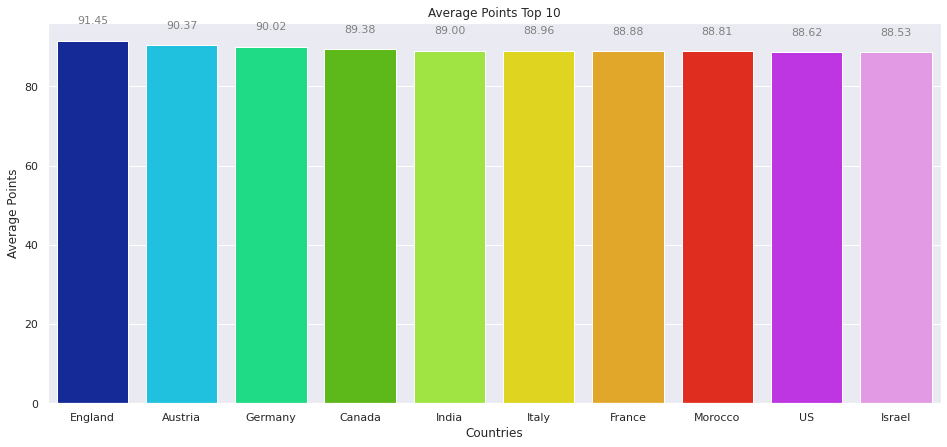

In [157]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=data_copy.groupby("country").mean().sort_values(by="points",ascending=False).points.index[:10], y=data_copy.groupby("country").mean().sort_values(by="points",ascending=False).points.values[:10], palette="gist_ncar")
plt.xlabel("Countries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

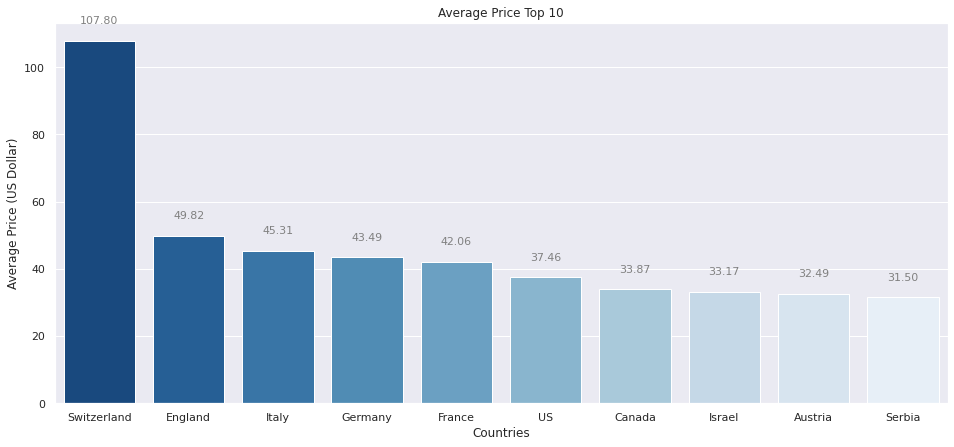

In [158]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=data_copy.groupby("country").mean().sort_values(by="price",ascending=False).price.index[:10], y=data_copy.groupby("country").mean().sort_values(by="price",ascending=False).price.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Price (US Dollar)")
plt.title("Average Price Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [212]:
top20Points = data_copy.sort_values(by="points", ascending=False).head(20)
labels = top20Points.country.value_counts().index
values = top20Points.country.value_counts().values
trace = go.Pie(labels=labels, values=values)
iplot([trace])

# Spitting into X and Y

In [0]:
X = data_copy['review_description']

In [0]:
Y = data_copy['variety']

In [161]:
print(X.shape,Y.shape)

(82657,) (82657,)


In [162]:
data_copy

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,Unknown,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Unknown,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,Unknown,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,Unknown,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,Unknown,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...
82652,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,Unknown,Montecillo,Tempranillo
82653,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,Unknown,Vivác Winery,Cabernet Sauvignon
82654,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,Unknown,Domaine de la Madone,Gamay
82655,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",Unknown,91,20.0,Bordeaux,Haut-Médoc,Unknown,Château Beaumont,Bordeaux-style Red Blend


# Count Vectorizer + TF-IDF Transformer --> TF-IDF Vectorizer

In [0]:
tfid = TfidfVectorizer(stop_words='english')

In [0]:
X_train_vect = tfid.fit_transform(X)

In [165]:
print(X_train_vect.shape)

(82657, 25716)


In [166]:
data_copy.groupby('variety').count()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
variety,,,,,,,,,,
Bordeaux-style Red Blend,5497,5497,5497,5497,5497,5497,5497,5497,5497,5497
Bordeaux-style White Blend,850,850,850,850,850,850,850,850,850,850
Cabernet Franc,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
Cabernet Sauvignon,7552,7552,7552,7552,7552,7552,7552,7552,7552,7552
Champagne Blend,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
Chardonnay,9403,9403,9403,9403,9403,9403,9403,9403,9403,9403
Gamay,816,816,816,816,816,816,816,816,816,816
Gewürztraminer,840,840,840,840,840,840,840,840,840,840
Grüner Veltliner,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055


# Applying the Models for predicting the variety of Wine.

## Linear SVM Model

In [0]:
svm = LinearSVC()


In [168]:
svm.fit(X_train_vect,Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
Y_pred_train = svm.predict(X_train_vect)

In [170]:
print(classification_report(Y,Y_pred_train))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.85      0.91      0.88      5497
Bordeaux-style White Blend       0.91      0.74      0.82       850
            Cabernet Franc       0.93      0.70      0.80      1095
        Cabernet Sauvignon       0.83      0.90      0.86      7552
           Champagne Blend       0.92      0.85      0.88      1133
                Chardonnay       0.89      0.96      0.92      9403
                     Gamay       0.94      0.85      0.89       816
            Gewürztraminer       0.95      0.94      0.95       840
          Grüner Veltliner       0.95      0.95      0.95      1055
                    Malbec       0.87      0.81      0.84      2119
                    Merlot       0.90      0.71      0.79      2471
                  Nebbiolo       0.88      0.93      0.90      2242
              Pinot Grigio       0.96      0.87      0.91       873
                Pinot Gris       0.95      0.83

## Naive-Bayes

In [0]:
mnb = MultinomialNB()
mnb.fit(X_train_vect,Y)
Y_pred = mnb.predict(X_train_vect)

In [172]:
print(classification_report(Y,Y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.55      0.66      0.60      5497
Bordeaux-style White Blend       0.00      0.00      0.00       850
            Cabernet Franc       0.00      0.00      0.00      1095
        Cabernet Sauvignon       0.47      0.76      0.58      7552
           Champagne Blend       0.94      0.01      0.03      1133
                Chardonnay       0.44      0.97      0.60      9403
                     Gamay       0.00      0.00      0.00       816
            Gewürztraminer       0.00      0.00      0.00       840
          Grüner Veltliner       0.94      0.05      0.09      1055
                    Malbec       0.94      0.01      0.01      2119
                    Merlot       1.00      0.00      0.00      2471
                  Nebbiolo       0.89      0.35      0.50      2242
              Pinot Grigio       1.00      0.00      0.01       873
                Pinot Gris       0.00      0.00

## Stochastic Gradient Descent Classifier

In [0]:
lm = SGDClassifier()
lm.fit(X_train_vect,Y)
Y_pred = lm.predict(X_train_vect)

In [174]:
print(classification_report(Y,Y_pred))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.67      0.83      0.74      5497
Bordeaux-style White Blend       0.74      0.32      0.45       850
            Cabernet Franc       0.64      0.37      0.47      1095
        Cabernet Sauvignon       0.70      0.76      0.73      7552
           Champagne Blend       0.78      0.54      0.64      1133
                Chardonnay       0.71      0.93      0.81      9403
                     Gamay       0.82      0.61      0.70       816
            Gewürztraminer       0.83      0.70      0.76       840
          Grüner Veltliner       0.82      0.78      0.80      1055
                    Malbec       0.68      0.63      0.66      2119
                    Merlot       0.77      0.46      0.57      2471
                  Nebbiolo       0.70      0.90      0.79      2242
              Pinot Grigio       0.82      0.56      0.67       873
                Pinot Gris       0.82      0.44

## Logistic Regression

In [0]:
lr = LogisticRegression(solver='saga')
lr.fit(X_train_vect,Y)
Y_pred = lr.predict(X_train_vect)

In [176]:
print(classification_report(Y,Y_pred))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.76      0.83      0.79      5497
Bordeaux-style White Blend       0.83      0.48      0.61       850
            Cabernet Franc       0.88      0.35      0.50      1095
        Cabernet Sauvignon       0.68      0.84      0.75      7552
           Champagne Blend       0.85      0.64      0.73      1133
                Chardonnay       0.76      0.94      0.84      9403
                     Gamay       0.87      0.61      0.71       816
            Gewürztraminer       0.88      0.70      0.78       840
          Grüner Veltliner       0.87      0.78      0.83      1055
                    Malbec       0.75      0.61      0.67      2119
                    Merlot       0.82      0.47      0.59      2471
                  Nebbiolo       0.85      0.86      0.85      2242
              Pinot Grigio       0.90      0.57      0.70       873
                Pinot Gris       0.86      0.52

# Results

In [182]:
print('Accuracies Obtained for Training:')
print(f'Support Vector Machine:',89,'%')
print('Naive-Bayes:',50,'%')
print('Stochastic Gradient Descent Classifier' ,74,'%')
print('Logistic Regression',68,'%')

Accuracies Obtained for Training:
Support Vector Machine: 89 %
Naive-Bayes: 50 %
Stochastic Gradient Descent Classifier 74 %
Logistic Regression 68 %


# Testing Data

In [0]:
data_test = pd.read_csv('test.csv')

In [184]:
data_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [185]:
data_test.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [0]:
data_test['price'].fillna(data_copy['price'].mean(),inplace=True)
data_test['country'].fillna('Unknown',inplace=True)
data_test.drop(['user_name'],axis=1,inplace=True)
data_test['designation'].fillna('Unknown',inplace=True)
data_test['province'].fillna('Unknown',inplace=True)
data_test['region_1'].fillna('Unknown',inplace=True)
data_test['region_2'].fillna('Unknown',inplace=True)

In [187]:
data_test.isnull().sum()

country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
dtype: int64

In [0]:
X_test = data_test['review_description']

In [0]:
X_test_vect = tfid.transform(X_test)

In [0]:
Y_pred_test = svm.predict(X_test_vect)

In [0]:
data_test['Predicted Variety'] = 0

In [195]:
for i,j in zip(Y_pred_test,range(len(data_test))):
  data_test['Predicted Variety'][j] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [196]:
data_test.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,Predicted Variety
0,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,Unknown,Mendoza Vineyards,Malbec
2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",Unknown,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,Unknown,Bodega Cuarto Dominio,Malbec
4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",Unknown,90,49.0,Tuscany,Brunello di Montalcino,Unknown,SassodiSole,Sangiovese


In [197]:
data_test.isnull().sum()

country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
Predicted Variety     0
dtype: int64

In [0]:
data_test.to_csv('predicted_test_dataset.csv')

In [0]:
data_predicted = pd.read_csv('predicted_test_dataset.csv')

In [200]:
data_predicted.head()

,Unnamed: 0,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,Predicted Variety
0,0,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,Unknown,Mendoza Vineyards,Malbec
2,2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",Unknown,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,Unknown,Bodega Cuarto Dominio,Malbec
4,4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",Unknown,90,49.0,Tuscany,Brunello di Montalcino,Unknown,SassodiSole,Sangiovese


# Five Actionable Insights.

1. The most number of wine were tasted by country U.S. That means increasing production and focusing on more on the quality can help increase profits.
2. The average points provided by the people of England were highest.    That means wine is favoured in England.
3. The average price is higher in Switzerland.
4.  The producer of top 20 wines are France taking a share of 50%,then U.S.(25%),Italy(20%), Portugal(5%) . So focusing more on these will help earning more profit.
5. The mean points obtained overall by the reviewers were 88.54 which should be improved as the lowest rating was 80 and highest 100. 
